In [1]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [3]:
df = pd.read_csv('data/arma.csv', index_col=0, parse_dates=True)

In [6]:
df.index = pd.date_range(start='2019-1-1', periods=len(df), freq='D')

In [7]:
df.head()

,y1,y2,y3,Unnamed: 4
2019-01-01,-1.851416,-0.308855,0.228167,NaN
2019-01-02,-1.534501,-0.527057,0.135259,NaN
2019-01-03,-2.600396,-2.101098,1.428202,NaN
2019-01-04,-2.636762,-2.586984,3.623135,NaN
2019-01-05,-0.147869,-1.778408,4.435423,NaN


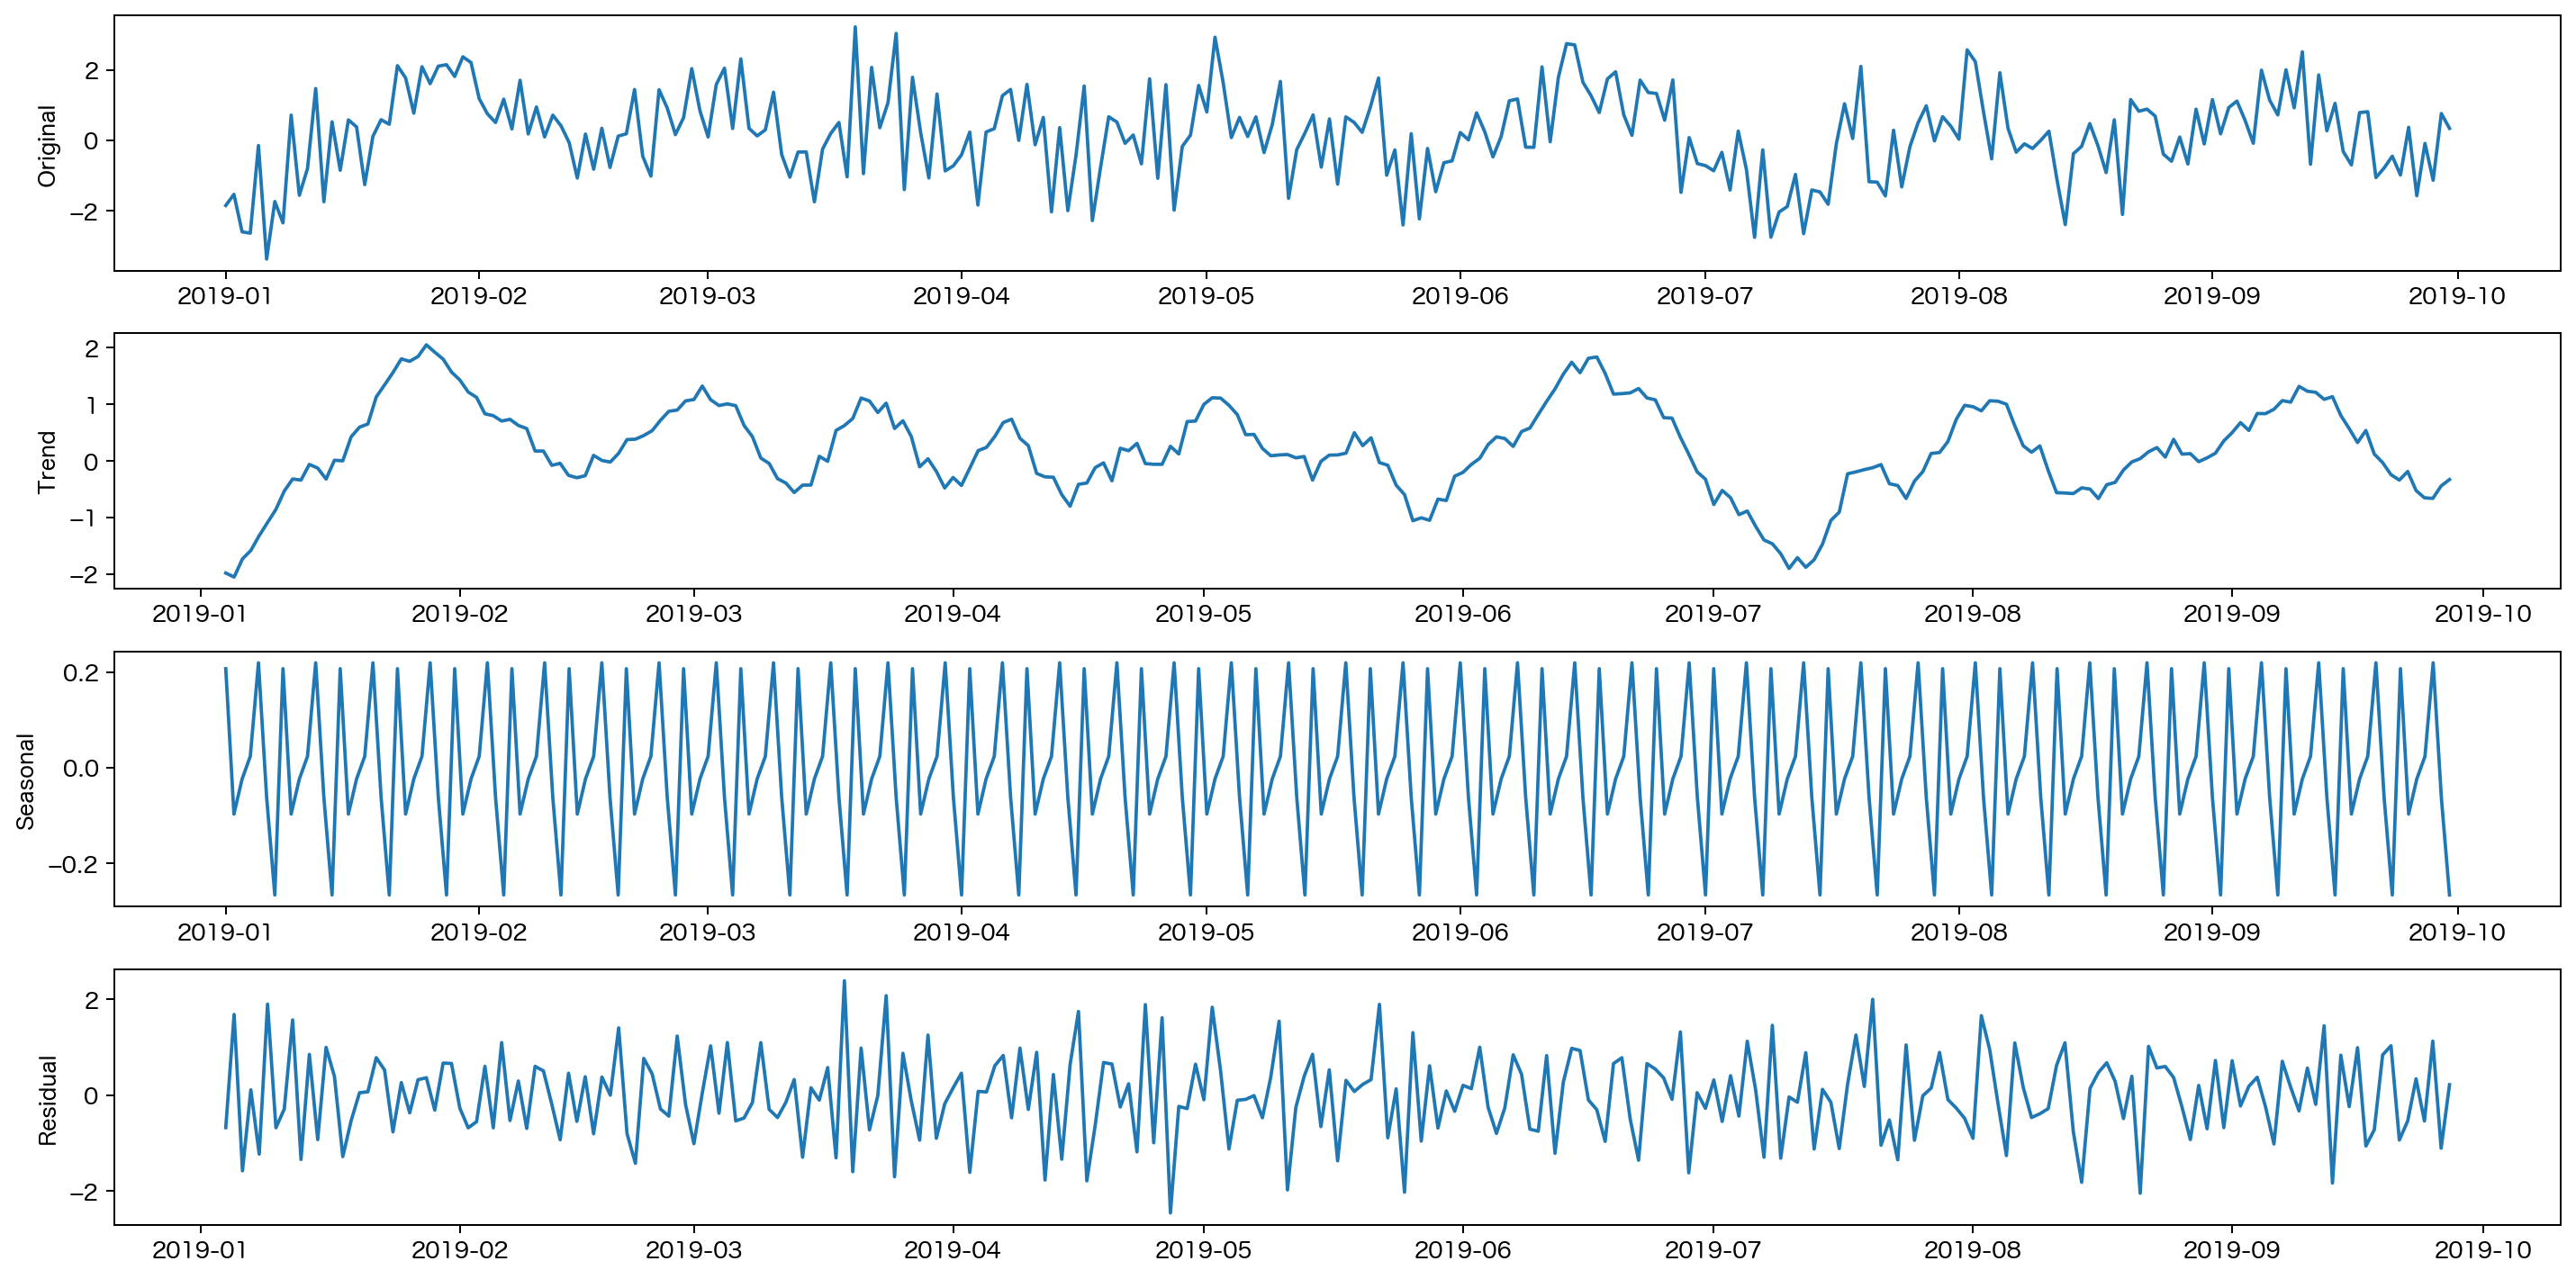

In [8]:
target = 'y1'

end = df.index.get_loc('2019-10-01')
train = df.iloc[:end][target]
res = sm.tsa.seasonal_decompose(train)

trend = res.trend
seasonal = res.seasonal
residual = res.resid

plt.figure(figsize=(16, 8), dpi=180)

plt.subplot(411)
plt.plot(train)
plt.ylabel('Original')

plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonal')

plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residual')

plt.tight_layout()

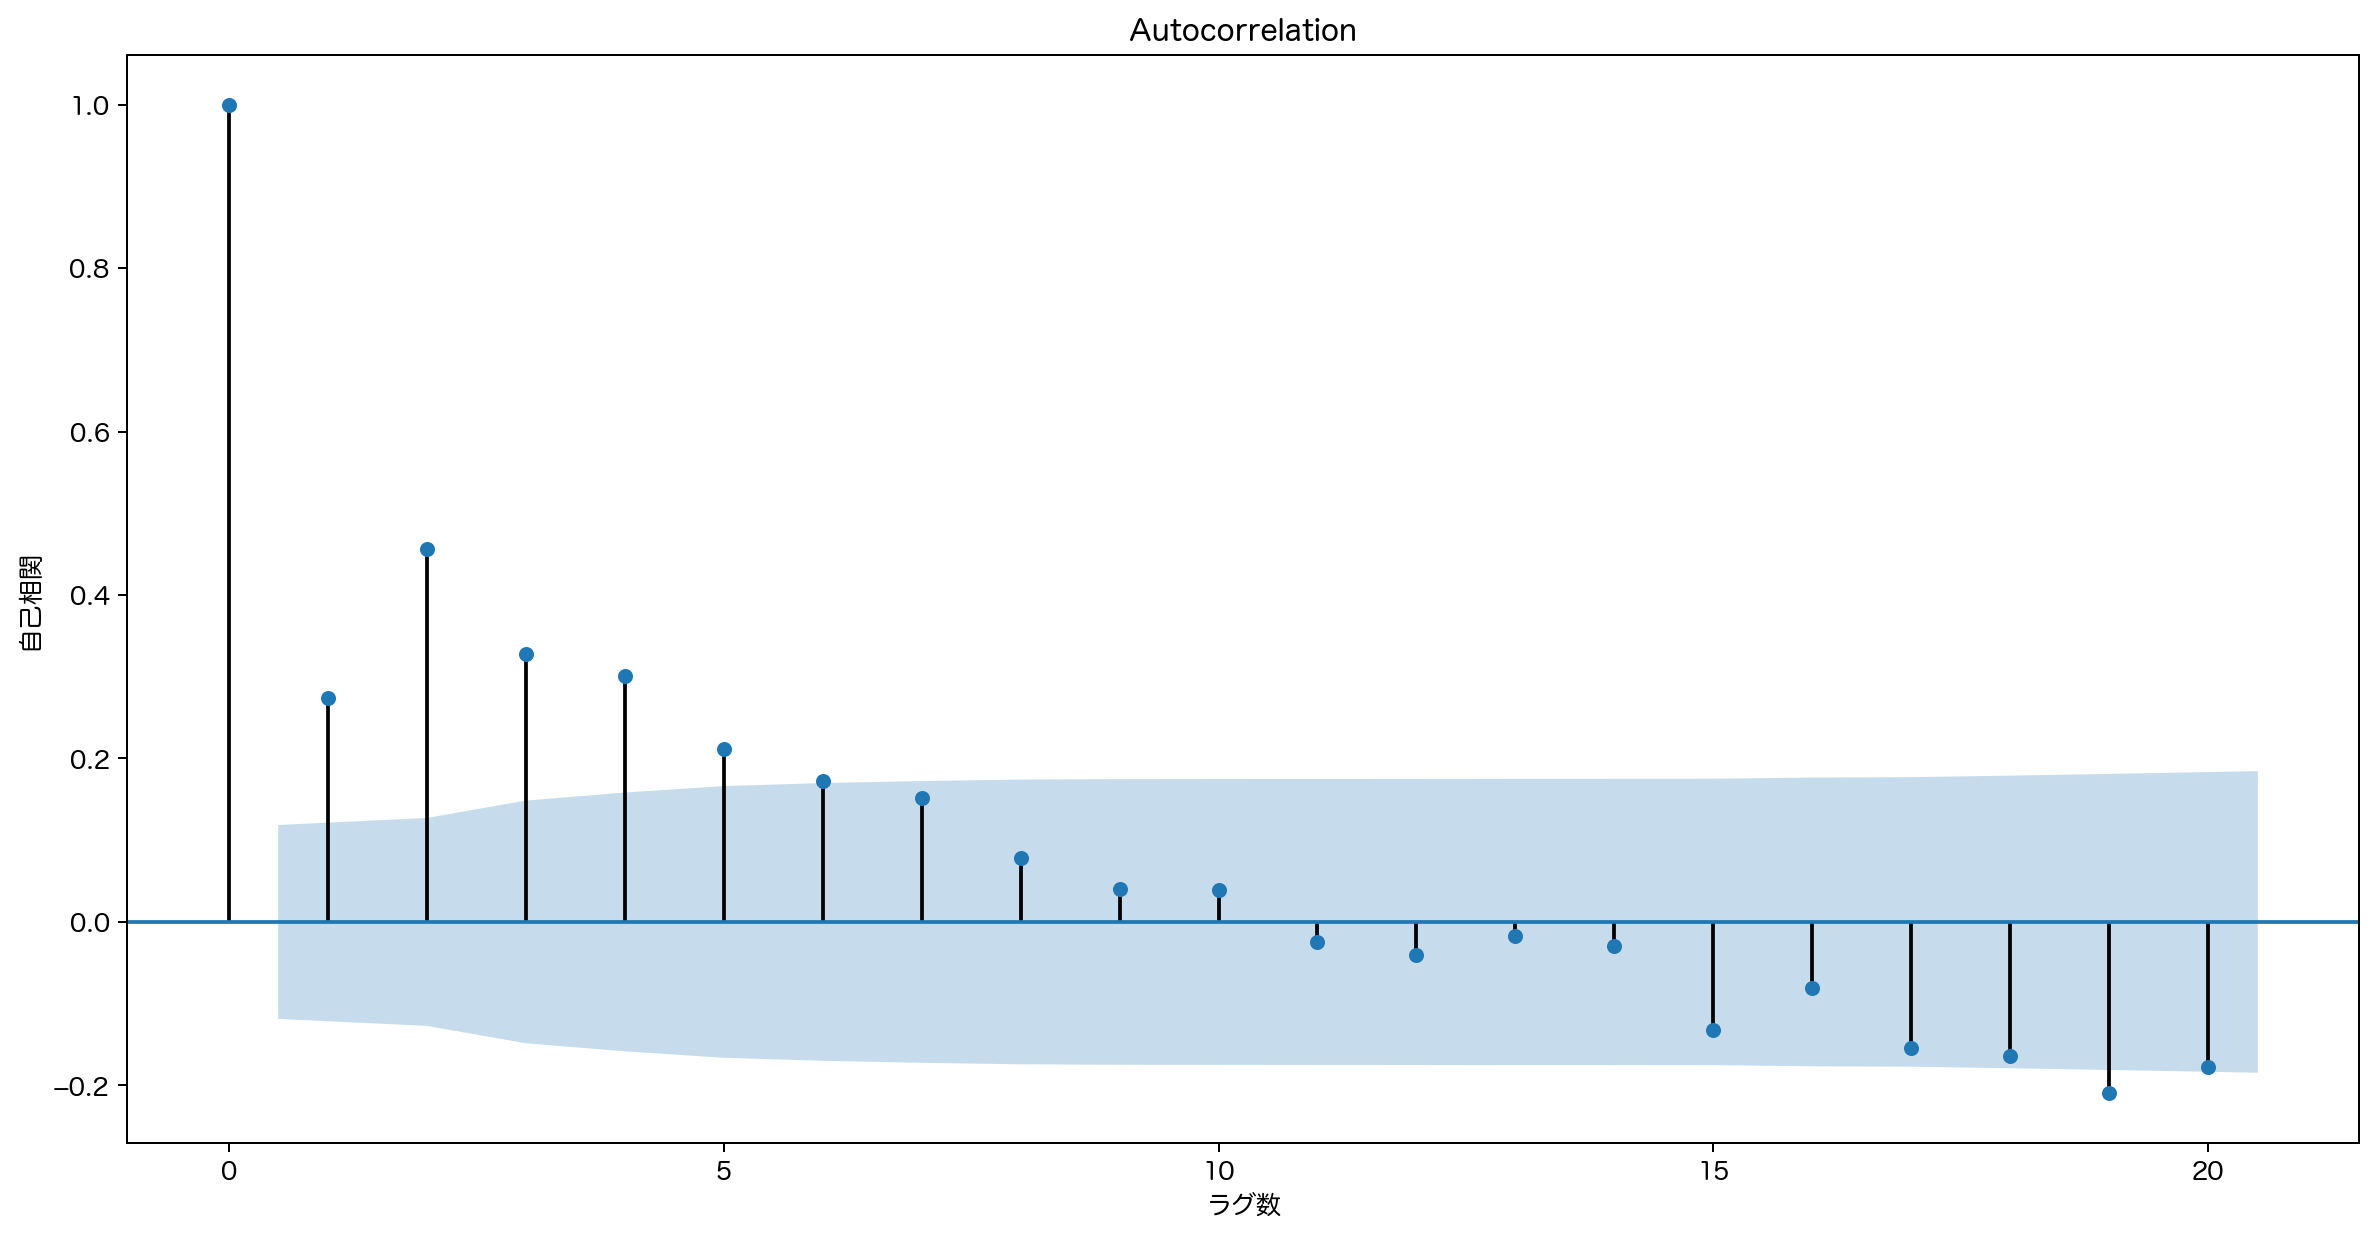

In [9]:
fig = plt.figure(figsize=(16, 8), dpi=180)
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(train, lags=20, ax=ax1)
ax1.set_xlabel('ラグ数')
ax1.set_ylabel('自己相関')
plt.show()
plt.close()

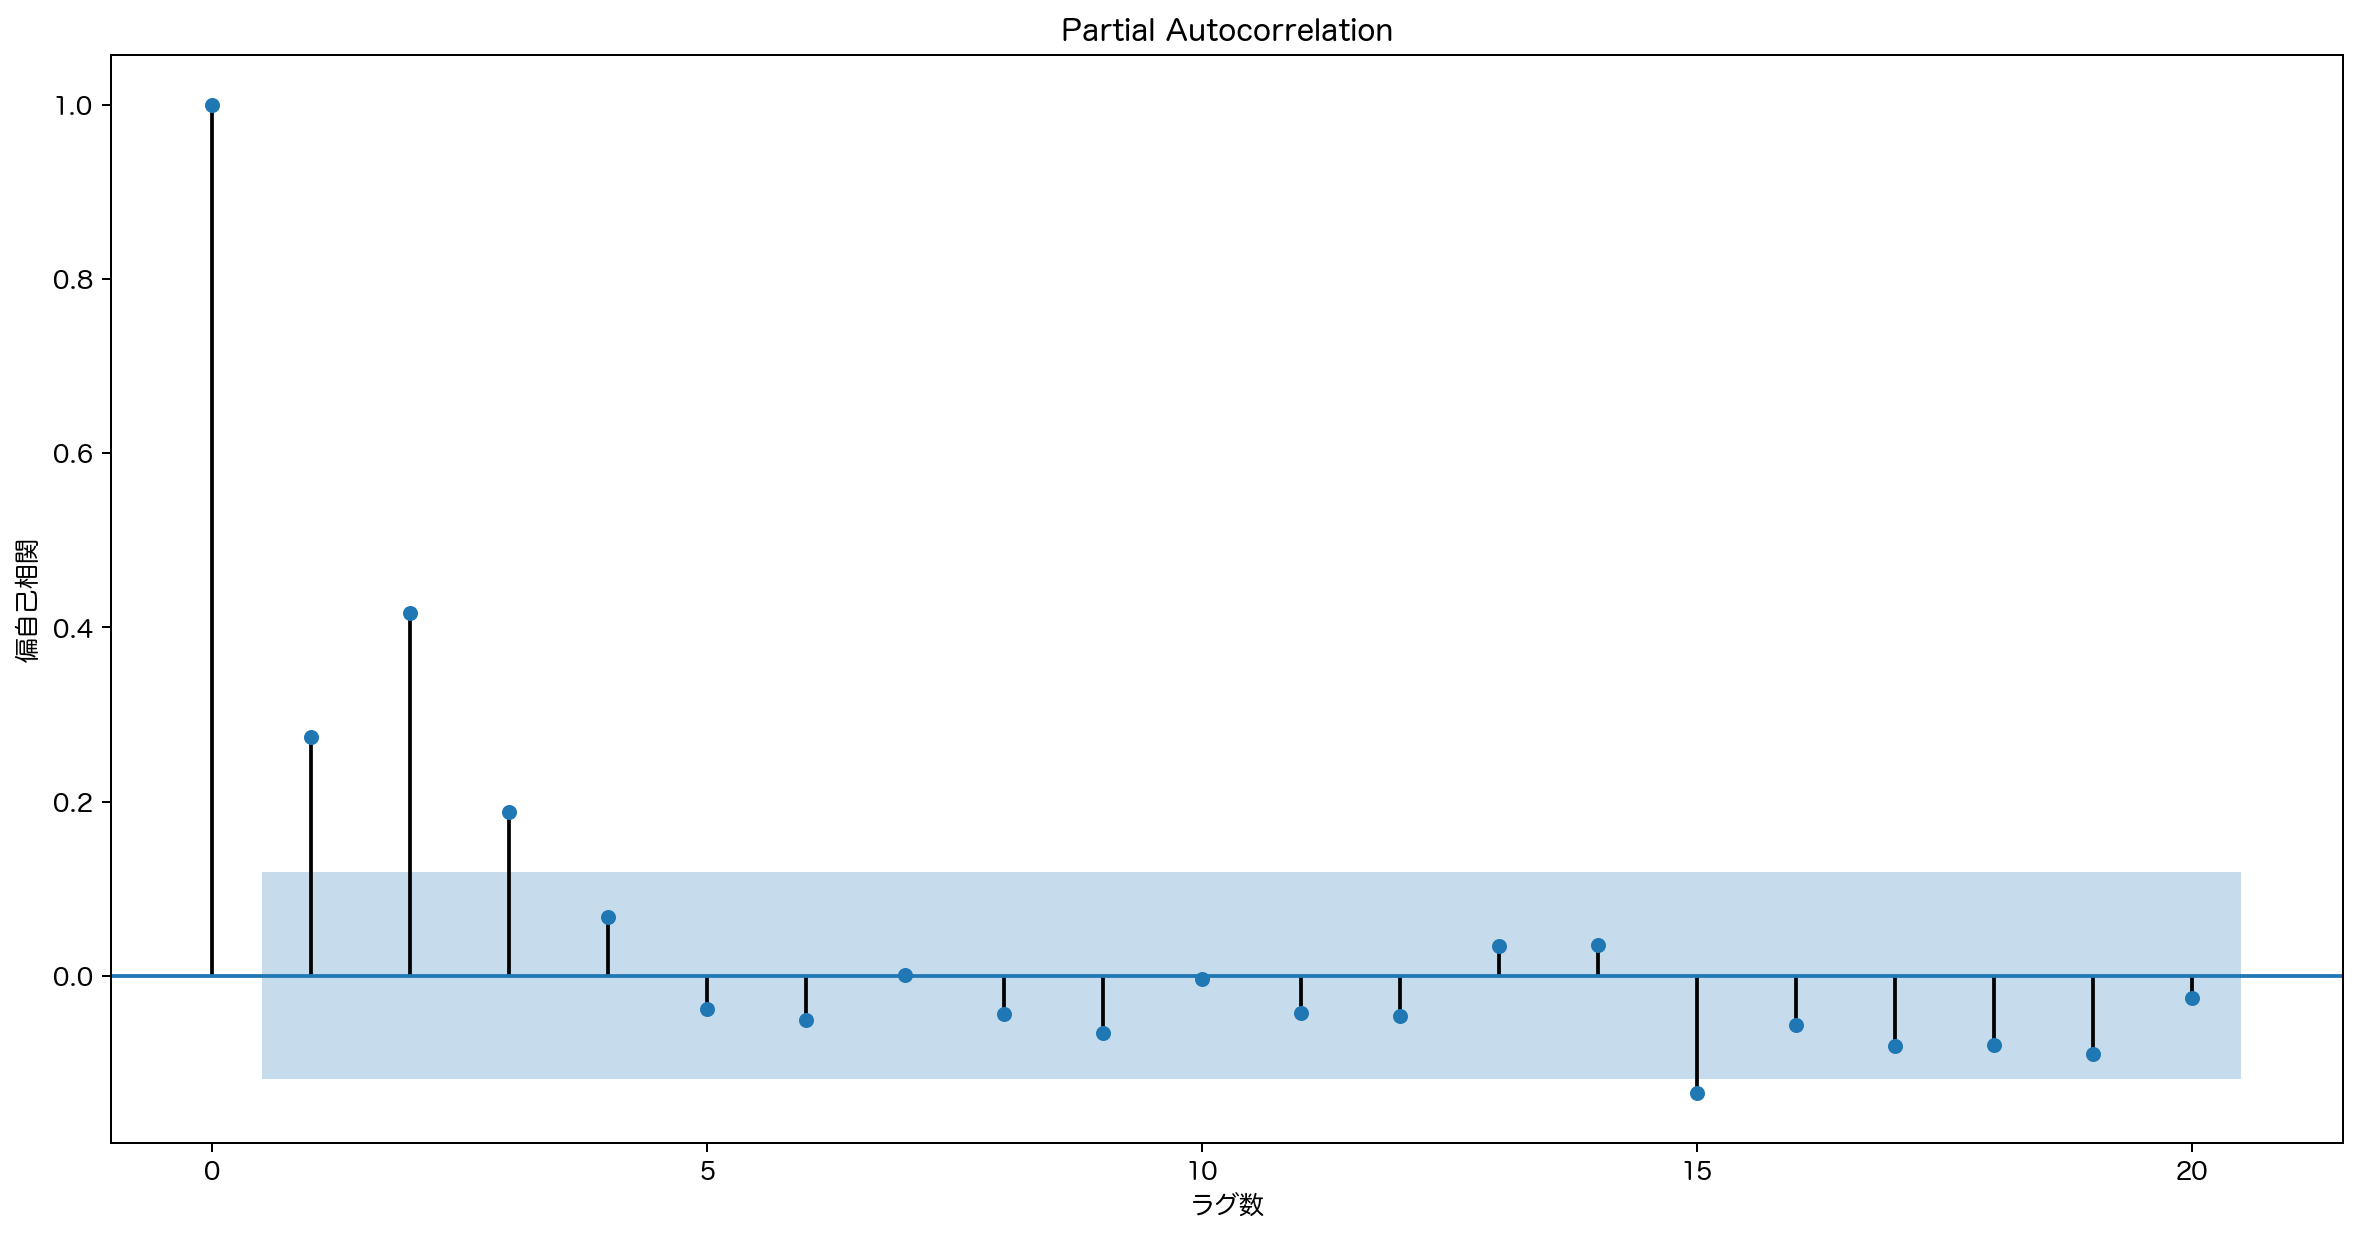

In [10]:
fig = plt.figure(figsize=(16, 8), dpi=180)
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax1)
ax1.set_xlabel('ラグ数')
ax1.set_ylabel('偏自己相関')
plt.show()
plt.close()

In [11]:
results = sm.tsa.stattools.adfuller(train)

print(f'ADF statistic: {results[0]}')
print(f'P-Value: {results[1]}')
print(f'Critical Values: {results[4]}')

ADF statistic: -5.170966042358231
P-Value: 1.0074841128183027e-05
Critical Values: {'1%': -3.4548039258751206, '5%': -2.872304928618605, '10%': -2.5725063100137175}


In [12]:
import itertools
 
p = range(0, 4)
q = range(0, 6)
  
pq = [(x[0], 0, x[1]) for x in list(itertools.product(p, q))]

import warnings
 
warnings.filterwarnings("ignore") # warnings を表示させないようにする

best_result = [0, 0, 10000000]
for param in pq:
    try:
        mod = sm.tsa.ARIMA(train, order = param)
        results = mod.fit()

        print('order{}, - AIC: {}'.format(param, results.aic))

        if results.aic < best_result[-1]:
            best_result = [param, results.aic]
    except:
        continue

print('\AICが最も良いモデル:', best_result)

order(0, 0, 0), - AIC: 896.6628969874108
order(0, 0, 1), - AIC: 886.9203152534328
order(0, 0, 2), - AIC: 852.9182694250727
order(0, 0, 3), - AIC: 840.0032759312055
order(0, 0, 4), - AIC: 830.3892734199096
order(0, 0, 5), - AIC: 830.5082089744293
order(1, 0, 0), - AIC: 877.2825042621198
order(1, 0, 1), - AIC: 836.1108096109729
order(1, 0, 2), - AIC: 816.9308062641352
order(1, 0, 3), - AIC: 818.7825392799323
order(1, 0, 4), - AIC: 820.5558458823671
order(1, 0, 5), - AIC: 822.5517941704127
order(2, 0, 0), - AIC: 827.3378496114889
order(2, 0, 1), - AIC: 818.2930468393909
order(2, 0, 2), - AIC: 818.7464797398728
order(2, 0, 3), - AIC: 820.2615293517788
order(2, 0, 4), - AIC: 822.22389079825
order(2, 0, 5), - AIC: 824.1237155746765
order(3, 0, 0), - AIC: 818.7250623869011
order(3, 0, 1), - AIC: 819.5328958094536
order(3, 0, 2), - AIC: 814.0517869927186
order(3, 0, 3), - AIC: 815.3985037075869
order(3, 0, 4), - AIC: 817.2918487844087
\AICが最も良いモデル: [(3, 0, 2), 814.0517869927186]


In [14]:
mod = sm.tsa.ARIMA(train, order = best_result[0] )
results = mod.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                     y1   No. Observations:                  273
Model:                     ARMA(3, 2)   Log Likelihood                -400.026
Method:                       css-mle   S.D. of innovations              1.045
Date:                Wed, 23 Feb 2022   AIC                            814.052
Time:                        21:44:48   BIC                            839.318
Sample:                    01-01-2019   HQIC                           824.194
                         - 09-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1849      0.066      2.790      0.006       0.055       0.315
ar.L1.y1       1.5418      0.101     15.320      0.000       1.345       1.739
ar.L2.y1      -0.2402      0.167     -1.437      0.1

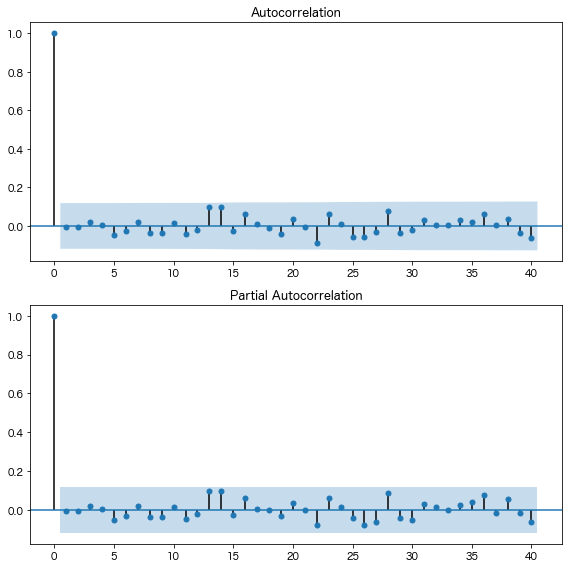

In [15]:
arima_resid = results.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(arima_resid, lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(arima_resid, lags=40, ax=ax2)

plt.tight_layout()

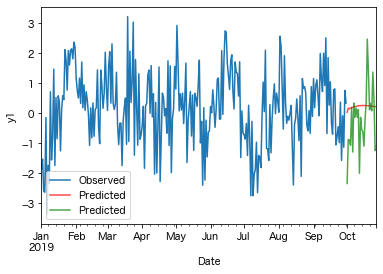

In [17]:
pred = results.predict('2019-10-01', '2019-10-27')

train.plot(label='Observed')
pred.plot(label='Predicted', alpha=.7, color='r')
df.iloc[end:]['y1'].plot(label='Predicted', alpha=.7, color='g')

plt.xlabel('Date')
plt.ylabel('y1')
plt.legend();